In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


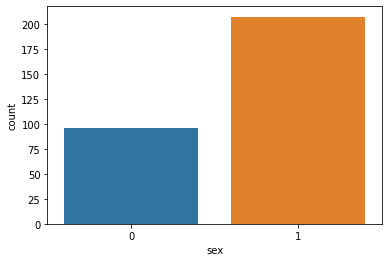

In [5]:
sns.countplot(x= 'sex', data=df)

# Logistic Regression

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X= df.drop('target', axis=1)
y= df['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logm= LogisticRegression()

In [12]:
logm.fit(X_train, y_train)

E:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
prediction =logm.predict(X_test)

In [14]:
from sklearn.metrics import classification_report

In [15]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        60
           1       0.80      0.92      0.86        62

    accuracy                           0.84       122
   macro avg       0.85      0.84      0.84       122
weighted avg       0.85      0.84      0.84       122



# Knn

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler= StandardScaler()

In [74]:
scaler.fit(df.drop('target',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [75]:
scaled_features = scaler.transform(df.drop('target',axis=1))

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
X1= scaled_features
y= df['target']
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.4, random_state=101)

In [78]:
knn = KNeighborsClassifier(n_neighbors=16)

In [79]:
knn.fit(X1_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [80]:
pred = knn.predict(X1_test)

In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        60
           1       0.78      0.92      0.84        62

    accuracy                           0.83       122
   macro avg       0.84      0.83      0.83       122
weighted avg       0.84      0.83      0.83       122



In [29]:
error_rate= []

for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

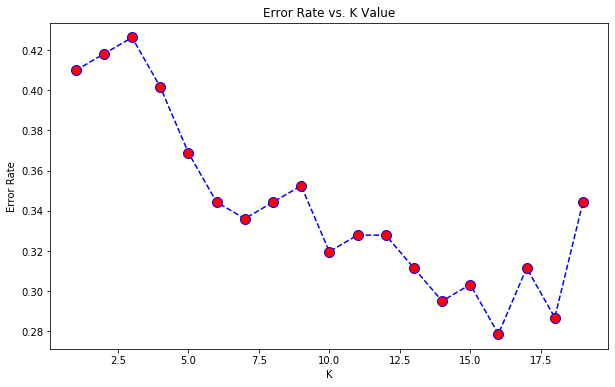

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# #Decision tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dtree= DecisionTreeClassifier()

In [61]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
pred_t = dtree.predict(X_test)

In [68]:
print(classification_report(y_test,pred_t))

              precision    recall  f1-score   support

           0       0.87      0.77      0.81        60
           1       0.80      0.89      0.84        62

    accuracy                           0.83       122
   macro avg       0.83      0.83      0.83       122
weighted avg       0.83      0.83      0.83       122



# Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
pred_r= rfc.predict(X_test)

In [70]:
print(classification_report(y_test,pred_r))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80        60
           1       0.78      0.90      0.84        62

    accuracy                           0.82       122
   macro avg       0.83      0.82      0.82       122
weighted avg       0.83      0.82      0.82       122

